# Plot the results
This jupyter notebook shows two brief examples of how to plot the results (i.e. performance metrics) of a repeated cross-validation experiment and compare the performances over different combinations of modalities for both classification and survival tasks.

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd 

# Setup for local running - please delete this block
import sys
sys.path.append('C:\\Users\\ncaptier\\Documents\\GitHub\\multipit\\')

from multipit.result_analysis.compute_metrics import compute_all_classif, compute_cindex
from multipit.result_analysis.plot import plot_metrics

## 1. Display classification results

###  1.1. Load results

In [4]:
main_directory = "classification\\xgboost_perm_100cv_OS_2209_nolivernorm\\"
df = pd.read_csv(main_directory + "predictions.csv").rename(columns = {"Unnamed: 0": "samples"}).drop(columns = ["dummy"])
df.drop(columns="samples").head()

,repeat,clinicals,radiomics,pathomics,RNA,clinicals+radiomics,clinicals+pathomics,clinicals+RNA,radiomics+pathomics,radiomics+RNA,pathomics+RNA,clinicals+radiomics+pathomics,clinicals+radiomics+RNA,clinicals+pathomics+RNA,radiomics+pathomics+RNA,clinicals+radiomics+pathomics+RNA,fold_index,label
0,0.0,0.589144,0.500000,0.514520,0.500000,0.638059,0.584721,0.622264,0.553983,0.500000,0.535485,0.621743,0.658860,0.609943,0.564178,0.635850,0.0,1.0
1,0.0,0.559329,0.508867,0.608853,0.327443,0.542935,0.624402,0.520234,0.577555,0.450075,0.527213,0.601154,0.520136,0.588865,0.526563,0.576787,5.0,0.0
2,0.0,0.441417,0.535063,0.491944,0.414336,0.482720,0.445954,0.413705,0.521704,0.491417,0.455992,0.480305,0.450507,0.413282,0.487469,0.448577,8.0,0.0
3,0.0,0.464910,0.509158,0.462009,0.500000,0.482017,0.441719,0.445623,0.480589,0.515133,0.446343,0.461174,0.476427,0.420133,0.474244,0.450640,3.0,1.0
4,0.0,0.577890,0.560151,0.482865,0.500000,0.586602,0.578041,0.682947,0.557210,0.646759,0.464876,0.603863,0.670777,0.624255,0.578321,0.652808,5.0,1.0


### 1.2 Load data

In [7]:
df_clinicals = pd.read_csv("clinicals.csv", index_col = 0, sep=";")
bool_mask = (df_clinicals['OS'].isnull()) | ((df_clinicals['OS'] <= 365) & (df_clinicals['Statut Vital'] == "Vivant"))
df_clinicals = df_clinicals[~bool_mask]
patient_clinicals = df_clinicals.index

df_omics = pd.read_csv("omics.csv", sep=";", index_col=0)
patient_omics = df_omics.index

df_radiomics = pd.read_csv("radiomics.csv", index_col=0, sep=";")
patient_radiomics = df_radiomics.index

df_pathomics = pd.read_csv("pathomics.csv", index_col=0, sep=";")
patient_pathomics = df_pathomics.index

all_patients = set(patient_radiomics) & set(patient_pathomics) & set(patient_clinicals) & set(patient_omics)

In [8]:
print("Number of patients with all modas available: ", len(all_patients))

Number of patients with all modas available:  77


### 1.3 Compute classification metrics

In [9]:
results = compute_all_classif(df.set_index("samples").loc[list(set(list(all_patients)) & set(df["samples"].unique()))],
                              names=list(df.columns[2:-2].values)
                             )

new_cols = {}
for col in results.columns.values[1:]:
    l = col.split("+")
    new = []
    for item in l:
        if item == 'radiomics':
            new.append('R')
        if item == 'RNA':
            new.append('RNA')
        if item == 'pathomics':
            new.append("P")
        if item == 'clinicals':
            new.append("C")
    new_cols[col] = "+".join(new)

results = results.rename(columns = new_cols)
results

,metric,C,R,P,RNA,C+R,C+P,C+RNA,R+P,R+RNA,P+RNA,C+R+P,C+R+RNA,C+P+RNA,R+P+RNA,C+R+P+RNA
0,sensitivity,0.368421,0.421053,0.473684,0.684211,0.473684,0.578947,0.526316,0.526316,0.684211,0.578947,0.526316,0.578947,0.578947,0.631579,0.578947
1,specificity,0.672414,0.706897,0.689655,0.896552,0.620690,0.620690,0.741379,0.689655,0.741379,0.827586,0.672414,0.793103,0.741379,0.793103,0.793103
2,f1_score,0.311111,0.363636,0.391304,0.684211,0.360000,0.423077,0.454545,0.425532,0.553191,0.550000,0.416667,0.523810,0.488889,0.558140,0.523810
3,balanced_accuracy,0.520417,0.563975,0.581670,0.790381,0.547187,0.599819,0.633848,0.607985,0.712795,0.703267,0.599365,0.686025,0.660163,0.712341,0.686025
4,mathews_coef,0.037226,0.117803,0.147576,0.580762,0.082963,0.173920,0.246467,0.193557,0.381421,0.393535,0.176821,0.350455,0.292020,0.395286,0.350455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,specificity,0.775862,0.724138,0.741379,0.793103,0.758621,0.706897,0.793103,0.672414,0.706897,0.706897,0.775862,0.775862,0.793103,0.741379,0.827586
596,f1_score,0.400000,0.478261,0.300000,0.590909,0.500000,0.285714,0.487805,0.480000,0.588235,0.500000,0.476190,0.577778,0.450000,0.583333,0.550000
597,balanced_accuracy,0.598457,0.651543,0.528584,0.738657,0.668784,0.511343,0.659710,0.651996,0.748185,0.669238,0.651089,0.730036,0.633394,0.739111,0.703267
598,mathews_coef,0.190619,0.273835,0.055341,0.439464,0.310800,0.021369,0.304831,0.267236,0.434225,0.301161,0.284638,0.419416,0.258257,0.425501,0.393535


In [11]:
results[results["metric"]=="roc_auc"].drop(columns = 'metric').apply(['mean', 'std'])

,C,R,P,RNA,C+R,C+P,C+RNA,R+P,R+RNA,P+RNA,C+R+P,C+R+RNA,C+P+RNA,R+P+RNA,C+R+P+RNA
mean,0.591897,0.616479,0.543512,0.750554,0.657169,0.621379,0.779927,0.623711,0.806252,0.726470,0.668158,0.810862,0.761561,0.769011,0.784365
std,0.046401,0.038671,0.047115,0.041767,0.044742,0.048565,0.042371,0.041550,0.033935,0.040244,0.044537,0.033933,0.043629,0.036266,0.039099


### 1.4 Plot results

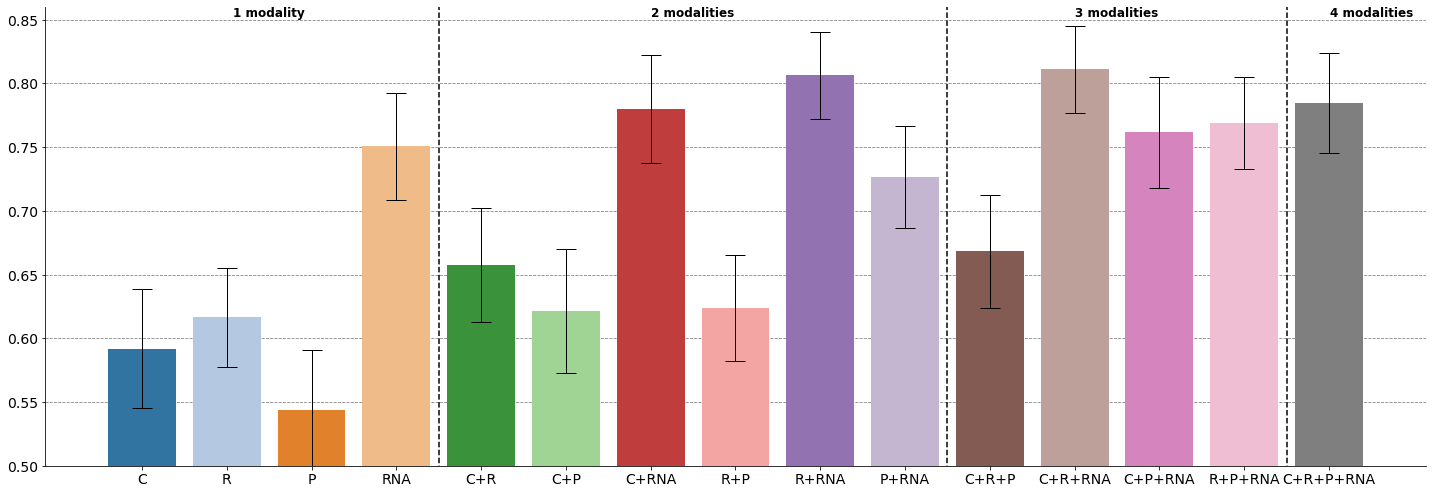

In [17]:
fig = plot_metrics(results,
                   metrics="roc_auc",
                   models = list(results.columns[1:]),
                   annotations = {"1 modality": (0, 3), "2 modalities": (4, 9), "3 modalities": (10, 13), "4 modalities": (14, 15)},
                   title=None,
                   ylim=(0.5, 0.86),
                   y_text=0.85,
                   ax=None)

## 2. Display survival prediction results

### 2.1 Load results

In [21]:
main_directory = "survival\\RF_perm_100cv_OS_2109_noliversegmentation\\"
df = pd.read_csv(main_directory + "predictions.csv")
df.drop(columns="samples").head()

,repeat,clinicals,radiomics,pathomics,RNA,clinicals+radiomics,clinicals+pathomics,clinicals+RNA,radiomics+pathomics,radiomics+RNA,pathomics+RNA,clinicals+radiomics+pathomics,clinicals+radiomics+RNA,clinicals+pathomics+RNA,radiomics+pathomics+RNA,clinicals+radiomics+pathomics+RNA,fold_index,label.time,label.event
0,0.0,0.568705,0.000000,-1.088434,0.000000,0.568705,-0.259865,0.568705,-1.088434,0.000000,-1.088434,-0.259865,0.568705,-0.259865,-1.088434,-0.259865,6.0,262.0,1.0
1,0.0,0.321816,-0.355895,0.735641,-0.996944,-0.017040,0.528729,-0.337564,0.189873,-0.676420,-0.130651,0.233854,-0.343674,0.020171,-0.205733,-0.073845,8.0,1510.0,0.0
2,0.0,0.200006,0.758021,0.069067,0.322129,0.479013,0.134536,0.261068,0.413544,0.540075,0.195598,0.342364,0.426719,0.197067,0.383072,0.337306,7.0,830.0,1.0
3,0.0,-0.701541,-0.281650,-0.479457,0.000000,-0.491595,-0.590499,-0.701541,-0.380553,-0.281650,-0.479457,-0.487549,-0.491595,-0.590499,-0.380553,-0.487549,8.0,243.0,1.0
4,0.0,0.160662,1.575924,-0.120972,0.000000,0.868293,0.019845,0.160662,0.727476,1.575924,-0.120972,0.538538,0.868293,0.019845,0.727476,0.538538,0.0,361.0,1.0


### 2.2 Load data

In [22]:
df_clinicals = pd.read_csv("clinicals.csv", index_col = 0, sep=";")
bool_mask = df_clinicals['OS'].isnull()
df_clinicals = df_clinicals[~bool_mask]
patient_clinicals = df_clinicals.index

df_omics = pd.read_csv("omics.csv", sep=";", index_col=0)
patient_omics = df_omics.index

df_radiomics = pd.read_csv("radiomics.csv", index_col=0, sep=";")
patient_radiomics = df_radiomics.index

df_pathomics = pd.read_csv("pathomics.csv", index_col=0, sep=";")
patient_pathomics = df_pathomics.index

all_patients = set(patient_radiomics) & set(patient_pathomics) & set(patient_clinicals) & set(patient_omics)

In [23]:
print("Number of patients with all modas available: ", len(all_patients))

Number of patients with all modas available:  79


### 2.3 Compute C-index

In [24]:
data_train = Surv.from_arrays(event=df[df["repeat"] == 0]["label.event"].values,
                              time=df[df["repeat"] == 0]["label.time"].values)

results = compute_cindex(df.set_index("samples").loc[list(set(list(all_patients)) & set(df["samples"].unique()))],
                         names=list(df.columns[2:-3].values),
                         data_train = data_train)

new_cols = {}
for col in results.columns.values[1:]:
    l = col.split("+")
    new = []
    for item in l:
        if item == 'radiomics':
            new.append('R')
        if item == 'RNA':
            new.append('RNA')
        if item == 'pathomics':
            new.append("P")
        if item == 'clinicals':
            new.append("C")
    new_cols[col] = "+".join(new)

results = results.rename(columns = new_cols)
results

,metric,C,R,P,RNA,C+R,C+P,C+RNA,R+P,R+RNA,P+RNA,C+R+P,C+R+RNA,C+P+RNA,R+P+RNA,C+R+P+RNA
0,c_index,0.659810,0.589693,0.607118,0.693620,0.678043,0.677309,0.749478,0.655850,0.699615,0.692120,0.692686,0.725447,0.754048,0.708004,0.735309
1,c_index,0.695589,0.592447,0.597955,0.691800,0.673513,0.683269,0.762107,0.649618,0.698007,0.671555,0.700982,0.746797,0.749128,0.708973,0.746751
2,c_index,0.690391,0.626409,0.589263,0.696218,0.688368,0.693160,0.760881,0.660076,0.703450,0.677189,0.702931,0.744362,0.755680,0.709648,0.742564
3,c_index,0.668751,0.635003,0.627711,0.671152,0.687855,0.701360,0.731493,0.687901,0.690491,0.676949,0.729386,0.730354,0.723863,0.719733,0.745682
4,c_index,0.671193,0.608000,0.603053,0.697055,0.678924,0.678217,0.738403,0.661799,0.712107,0.698718,0.691363,0.737642,0.737483,0.713351,0.726051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,c_index,0.680817,0.619918,0.589981,0.683733,0.698637,0.682220,0.748170,0.643427,0.695090,0.691974,0.701519,0.742775,0.740572,0.700029,0.736994
96,c_index,0.683808,0.599275,0.606327,0.673352,0.698419,0.718908,0.762587,0.658827,0.693451,0.697164,0.718937,0.746262,0.771295,0.719272,0.757630
97,c_index,0.681936,0.622950,0.632312,0.691211,0.702253,0.713004,0.764441,0.703018,0.711824,0.705405,0.736925,0.752371,0.759428,0.742972,0.767404
98,c_index,0.656847,0.615154,0.590876,0.674011,0.692707,0.681858,0.744600,0.644136,0.691802,0.683360,0.698968,0.739034,0.745125,0.704566,0.732215


In [25]:
results[results["metric"]=="c_index"].drop(columns = 'metric').apply(['mean', 'std'])

,C,R,P,RNA,C+R,C+P,C+RNA,R+P,R+RNA,P+RNA,C+R+P,C+R+RNA,C+P+RNA,R+P+RNA,C+R+P+RNA
mean,0.673992,0.607245,0.588779,0.687014,0.687408,0.678410,0.747706,0.654439,0.700253,0.676774,0.701327,0.738519,0.736374,0.704616,0.737414
std,0.013987,0.018348,0.021441,0.017007,0.013717,0.018287,0.013546,0.018074,0.014133,0.018073,0.014694,0.011929,0.015782,0.014752,0.012897


### 2.4 Plot results

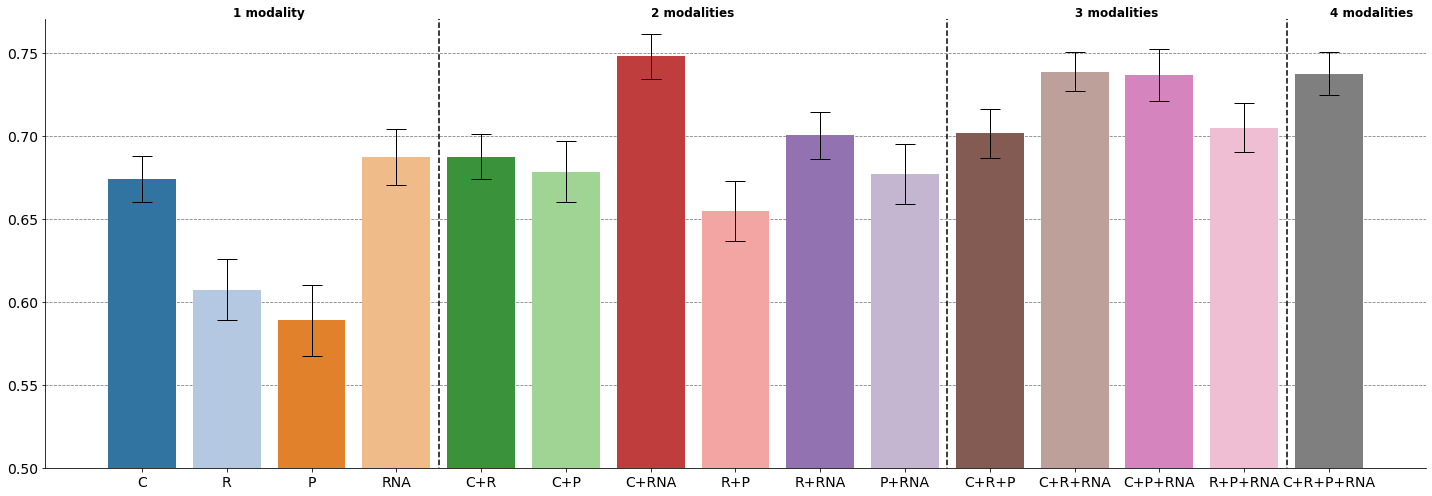

In [28]:
fig = plot_metrics(results,
                   metrics='c_index',
                   models = list(results.columns[1:]),
                   annotations = {"1 modality": (0, 3), "2 modalities": (4, 9), "3 modalities": (10, 13), "4 modalities": (14, 15)},
                   title=None, ylim=(0.5, 0.77), y_text=0.77,
                   ax=None)